Names: Guy Cohen, Shahar Amram

IDs: 206463606, 205457898

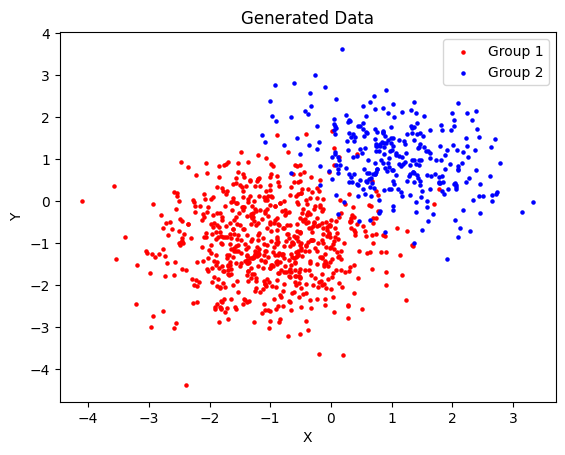

In [594]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

#A
#This code will generate two Gaussian distributions.

# Group 1 parameters
u1 = np.array([-1, -1])
cov1 = np.array([[0.8, 0], [0, 0.8]])

# Group 2 parameters
u2 = np.array([1, 1])
cov2 = np.array([[0.75, -0.2], [-0.2, 0.6]])

# Generate data for each group
group1 = np.random.multivariate_normal(u1, cov1, 700)
group2 = np.random.multivariate_normal(u2, cov2, 300)

# Concatenate the groups
data = np.concatenate([group1, group2])

# Plot the data
plt.scatter(group1[:, 0], group1[:, 1], color='red',label='Group 1', s=5)
plt.scatter(group2[:, 0], group2[:, 1], color='blue',label='Group 2', s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data')
plt.legend()
plt.show()

In [595]:
#B

# Initialize the parameters
k = 2 # number of clusters.
iterations = 100 # number of iterations.
n_points = len(data) # length of data=1000
pi = np.full(shape=k, fill_value=1/k) # array that stores the initial mixing coefficients for each cluster. It is initialized with equal weights.
u = np.array([np.random.rand(2) for _ in range(k)])# Use np.array instead of list
sigma = [np.eye(2) for _ in range(k)] # a list of length k that stores the initial covariance matrices for each cluster. Each covariance matrix is initialized as an identity matrix.


P(x) = (1 / ((2π)^(m/2) * √|sigma|)) * exp(-0.5 * (x - u)^T * inverse_sigma * (x - u))


In [596]:
#B- Continued..

def calculate_probability(data, u, covariance):
    n_points, m = data.shape
    determinant = np.linalg.det(covariance)
    inverse_covariance = np.linalg.inv(covariance)

    probabilities = np.zeros(n_points)
    for i in range(n_points):
        x = data[i]
        exponent = -0.5 * np.dot(np.dot((x - u), inverse_covariance), (x - u).T)
        probability = (1 / ((2 * np.pi) ** (m / 2) * np.sqrt(determinant))) * np.exp(exponent)
        probabilities[i] = probability

    return probabilities

π_j = (sum of responsibilities for cluster j) / (total number of data points) = (Σ w_{ij}) / m

U_j = (sum of (w_{ij} * x_i)) / (sum of w_{ij})=  (Σ (w_{ij} * x_i)) / (Σ w_{ij})

SIGMA_j = (sum of ( (x_i - U_j) * (x_i - U_j)^T)) / (sum of w_{ij})= (Σ ( (x_i - U_j) * (x_i - U_j)^T)) / (Σ w_{ij})





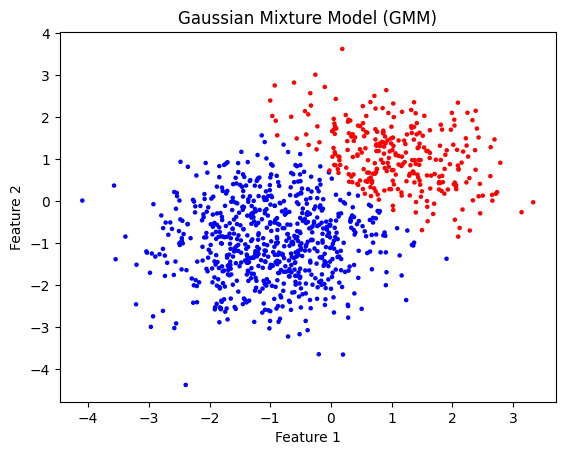

In [597]:
#B- Continued..
#Expectation-Maximization (EM) algorithm.
for _ in range(iterations):
    # Initialize an array w of zeros, n_points=1000, k=2.
    w = np.zeros((n_points, k))
    
    # Calculate the responsibility of each data point x in cluster j.
    for j in range(k):
        w[:, j] = calculate_probability(data, u[j], sigma[j]) * pi[j]
    
    # Normalize the responsibilities
    w /= np.sum(w, axis=1, keepdims=True)#Dividing each row by the sum of its elements.

    # Maximization
    m = np.sum(w, axis=0) #Calculates the sum of responsibilities.
    u = np.dot(w.T, data) / m[:, np.newaxis] #Calculates the weighted sum of the data points for each cluster.
    pi = np.sum(w, axis=0) / n_points #Computes the updated mixing coefficients.
    sigma = [(np.dot(w[:, j] * (data - u[j]).T, (data - u[j])) / m[j]) for j in range(k)] #Calculates the updated covariances (sigma) for each cluster.

# Predict the labels for the data points
labels = np.argmax(w, axis=1)


# Plot the data
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=ListedColormap(['blue', 'red']), s=5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model (GMM)')
plt.show()



## Conclusion:
The code implements the expectation-maximization (EM) algorithm for a Gaussian mixture model (GMM). It is iteratively update.

The EM algorithm consists of two phases: 
1. expectation phase. 

2. maximization phase.

In the expectations phase:
The responsibility of each data point in each cluster is calculated based on the current parameters.
These responsibilities are then normalized. 

In the maximum step, the means, mixing coefficients, and variances are updated based on the responsibilities and data points.

After running the EM algorithm, the code predicts the labels for the data points by selecting the cluster with the highest responsibility for each data point. 


